In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("merged_dataset.csv")

columns_to_drop = ['MH8A', 'MH8B', 'MH8C','MH8D', 'MH8E', 'MH8F','MH8G', 'MH8H', 'age_mh','Unnamed: 25']
df = df.drop(columns=columns_to_drop, axis=1)

display(df)


C:\Users\prana\AppData\Local\Temp\ipykernel_1236\1878376417.py:1: DtypeWarning: Columns (0,2,24,27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("merged_dataset.csv")


,Comfortable_speaking_about_A_or_D,Friends_Family_A_or_D,Anxious_or_Depressed,A_or_D_more_than_once,MH9A,MH9B,MH9C,MH9D,MH9E,MH9F,MH9G,MH9H,Age,age_var2,Gender,Household_Income,Subjective_Income,EMP_2010
0,2,2,2,,,,,,,,,,80,4,2,5,2,6
1,2,1,2,,,,,,,,,,23,1,1,4,1,1
2,2,2,2,,,,,,,,,,29,1,1,4,1,1
3,2,1,2,,,,,,,,,,60,3,2,4,2,1
4,2,1,2,,,,,,,,,,41,2,1,2,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119083,2,99,2,,,,,,,,,,27,1,2,5,1,1
119084,3,1,1,1,1,4,4,4,1,4,4,1,24,1,2,3,2,6
119085,3,2,2,,,,,,,,,,24,1,1,5,1,2
119086,2,2,2,,,,,,,,,,29,1,1,5,2,1


In [3]:
df = df[df.ne(99).all(axis=1)]
df = df[df.ne('99').all(axis=1)]

print(df.shape)

(108045, 18)


In [4]:
df = df.replace(' ', np.nan)
df.dropna(subset=['Comfortable_speaking_about_A_or_D','Friends_Family_A_or_D','Anxious_or_Depressed','Household_Income','EMP_2010'], inplace=True)

print(df.shape)

(106147, 18)


In [5]:
display(df)

,Comfortable_speaking_about_A_or_D,Friends_Family_A_or_D,Anxious_or_Depressed,A_or_D_more_than_once,MH9A,MH9B,MH9C,MH9D,MH9E,MH9F,MH9G,MH9H,Age,age_var2,Gender,Household_Income,Subjective_Income,EMP_2010
0,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,4,2,5,2,6
1,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1,1,4,1,1
2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,1,1,4,1,1
3,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,3,2,4,2,1
4,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,2,1,2,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119082,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,2,1,5,2,1
119084,3,1,1,1,1,4,4,4,1,4,4,1,24,1,2,3,2,6
119085,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,1,1,5,1,2
119086,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,1,1,5,2,1


In [6]:
print(df.isnull().sum())

Comfortable_speaking_about_A_or_D        0
Friends_Family_A_or_D                    0
Anxious_or_Depressed                     0
A_or_D_more_than_once                83985
MH9A                                 84172
MH9B                                 84472
MH9C                                 84361
MH9D                                 84177
MH9E                                 84265
MH9F                                 84350
MH9G                                 84385
MH9H                                 84268
Age                                      0
age_var2                                 0
Gender                                   0
Household_Income                         0
Subjective_Income                        0
EMP_2010                                 0
dtype: int64


In [5]:
train_data = df.dropna()
test_data = pd.merge(df, train_data, how='outer', indicator=True).loc[lambda x: x['_merge'] == 'left_only']

# Drop the indicator column and reset the index
test_data = test_data.drop(columns=['_merge']).reset_index(drop=True)
display(train_data)
display(test_data)

,Comfortable_speaking_about_A_or_D,Friends_Family_A_or_D,Anxious_or_Depressed,A_or_D_more_than_once,MH9A,MH9B,MH9C,MH9D,MH9E,MH9F,MH9G,MH9H,Age,age_var2,Gender,Household_Income,Subjective_Income,EMP_2010
10,2,1,1,1,3,2,1,2,2,2,3,3,78,4,1,2,4,6
14,2,1,1,1,2,2,2,4,4,4,2,1,63,3,2,2,4,6
26,1,1,1,1,1,1,1,1,4,1,1,1,72,4,2,2,2,6
34,3,1,1,1,1,4,2,1,2,2,4,1,69,4,1,5,1,6
36,2,1,1,1,1,4,1,2,2,4,1,1,34,2,2,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119012,3,2,1,1,4,1,4,4,1,1,4,1,20,1,1,4,1,6
119015,2,1,1,1,1,4,1,1,1,1,4,1,29,1,2,5,1,4
119024,2,1,1,1,4,4,1,4,1,1,1,1,45,2,2,5,1,1
119076,2,1,1,1,1,4,1,1,1,4,1,1,30,2,2,5,1,1


,Comfortable_speaking_about_A_or_D,Friends_Family_A_or_D,Anxious_or_Depressed,A_or_D_more_than_once,MH9A,MH9B,MH9C,MH9D,MH9E,MH9F,MH9G,MH9H,Age,age_var2,Gender,Household_Income,Subjective_Income,EMP_2010
0,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,4,2,5,2,6
1,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1,1,4,1,1
2,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1,1,4,1,1
3,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1,1,4,1,1
4,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,1,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86061,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,2,1,2,1,4
86062,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,2,1,1,4,4
86063,3,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,1,2,4,1,1
86064,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,2,2,4,3,6


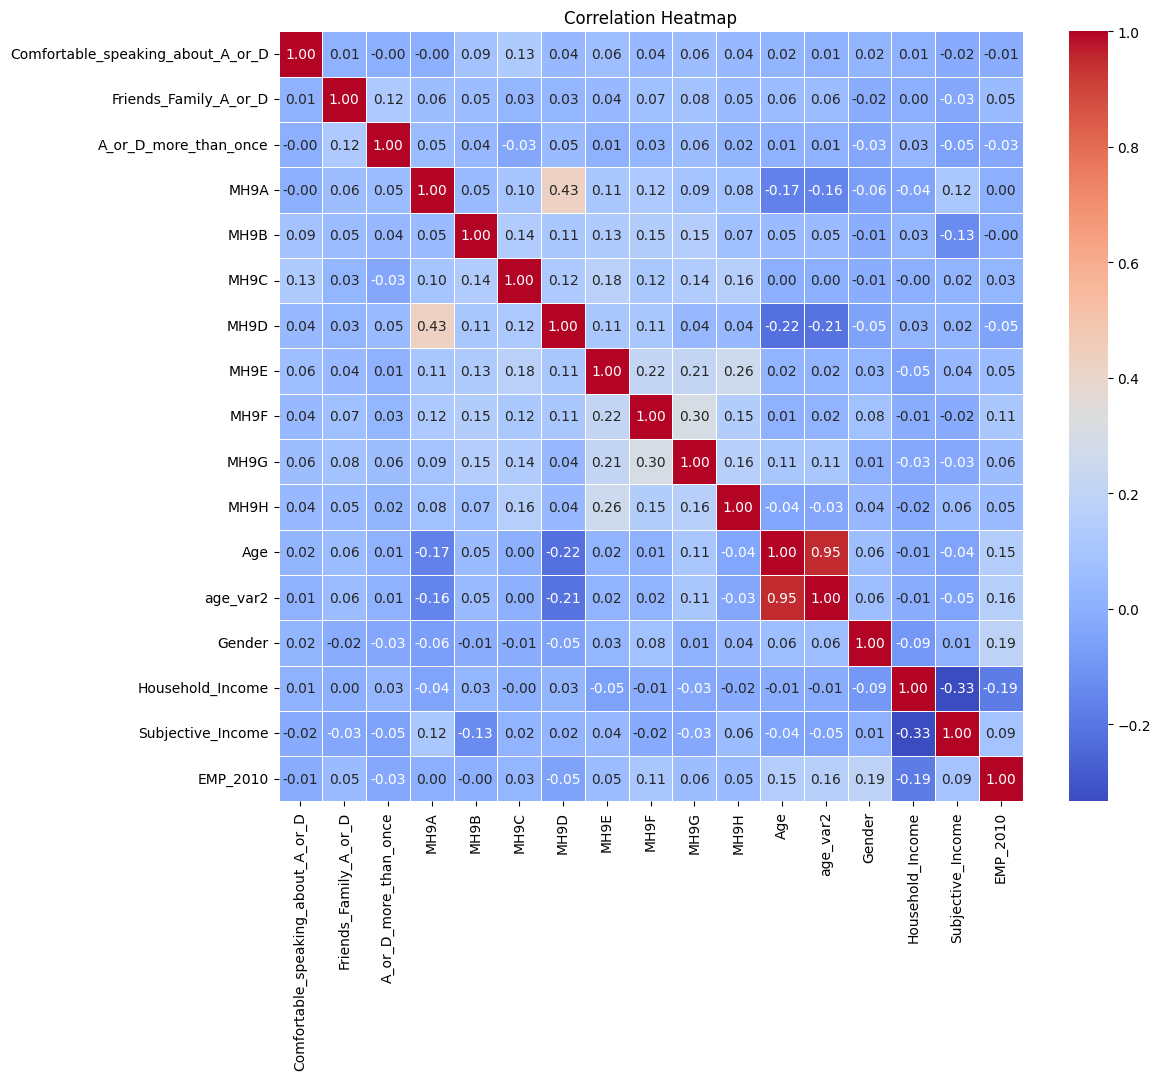

In [12]:

import seaborn as sns
import matplotlib.pyplot as plt


temp_df = train_data
temp_df = temp_df.apply(pd.to_numeric, errors='coerce')

temp_df = temp_df.drop(columns=['Anxious_or_Depressed'])

# Calculate the correlation matrix
correlation_matrix = temp_df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add title
plt.title('Correlation Heatmap')

plt.show()


In [37]:
features = ['Comfortable_speaking_about_A_or_D', 'Friends_Family_A_or_D',
       'Anxious_or_Depressed', 'Age', 'age_var2', 'Gender',
       'Household_Income', 'Subjective_Income', 'EMP_2010']

targets = ['A_or_D_more_than_once', 'MH9A', 'MH9B', 'MH9C',
       'MH9D', 'MH9E', 'MH9F', 'MH9G', 'MH9H']

In [38]:
#Random Forest Model - 

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

train_data_rf = train_data
test_data_rf = test_data


X = train_data_rf[features]
y = train_data_rf[targets]

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

model = RandomForestRegressor(n_estimators=150, max_depth=10,min_samples_split=20)

mse_scores = []

for train_index, val_index in kf.split(X):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]

    model_fold = RandomForestRegressor(n_estimators=150, max_depth=10,min_samples_split=20)

    model_fold.fit(X_train, y_train)

    pred_val = model_fold.predict(X_val)

    mse_fold = mean_squared_error(y_val, pred_val)
    mse_scores.append(mse_fold)

print(f'Mean MSE across {k} folds: {np.mean(mse_scores)}')
print(f'Standard Deviation of MSE across {k} folds: {np.std(mse_scores)}')

model.fit(X, y)
pred_test_rf = model.predict(test_data_rf[features])
predictions_rf = pred_test_rf.round()

predictions_df_rf = pd.DataFrame(predictions_rf, columns=targets)

test_data_rf[targets] = test_data_rf[targets].combine_first(predictions_df_rf)

display(test_data_rf)
mse_values=[]
mse_values.append(np.mean(mse_scores))


Mean MSE across 5 folds: 1.458649826206089
Standard Deviation of MSE across 5 folds: 0.0030002190098482244


,Comfortable_speaking_about_A_or_D,Friends_Family_A_or_D,Anxious_or_Depressed,A_or_D_more_than_once,MH9A,MH9B,MH9C,MH9D,MH9E,MH9F,MH9G,MH9H,Age,age_var2,Gender,Household_Income,Subjective_Income,EMP_2010
0,2,2,2,1.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,2.0,80,4,2,5,2,6
1,2,1,2,1.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,23,1,1,4,1,1
2,2,1,2,1.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,23,1,1,4,1,1
3,2,1,2,1.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,23,1,1,4,1,1
4,2,2,2,1.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,29,1,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86061,2,2,2,1.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,40,2,1,2,1,4
86062,3,2,2,1.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,30,2,1,1,4,4
86063,3,1,2,1.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,19,1,2,4,1,1
86064,3,2,2,1.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,2.0,48,2,2,4,3,6


In [39]:
#MSE for Random Forest
from sklearn.model_selection import train_test_split


#Calculating mean squared error on train_data
X = train_data_rf[features]
y = train_data_rf[targets]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = RandomForestRegressor(n_estimators=150, max_depth=10,min_samples_split=20)
model.fit(X_train, y_train)

pred = model.predict(X_test)
pred = pred.round()

mse_scores=[]

# Calculate and print the mean squared error for each target variable
for i, target in enumerate(targets):
    mse = mean_squared_error(y_test[target], pred[:, i])
    print(f'Mean Squared Error for {target}: {mse}')
    mse_scores.append(mse)

avg = sum(mse_scores)/len(targets)
print("\nAverage of all mse = ",avg)

mse_values.append(avg)



Mean Squared Error for A_or_D_more_than_once: 0.25168035847647496
Mean Squared Error for MH9A: 1.7752053771471248
Mean Squared Error for MH9B: 1.840926064227035
Mean Squared Error for MH9C: 1.30470500373413
Mean Squared Error for MH9D: 1.7179487179487178
Mean Squared Error for MH9E: 1.5083395568832463
Mean Squared Error for MH9F: 1.8740353497635052
Mean Squared Error for MH9G: 1.840926064227035
Mean Squared Error for MH9H: 1.507343788897187

Average of all mse =  1.5134566979227173


In [40]:
train_data = df.dropna()
#display(train_data)
test_data = pd.merge(df, train_data, how='outer', indicator=True).loc[lambda x: x['_merge'] == 'left_only']

# Drop the indicator column and reset the index
test_data = test_data.drop(columns=['_merge']).reset_index(drop=True)
display(train_data)
display(test_data)

,Comfortable_speaking_about_A_or_D,Friends_Family_A_or_D,Anxious_or_Depressed,A_or_D_more_than_once,MH9A,MH9B,MH9C,MH9D,MH9E,MH9F,MH9G,MH9H,Age,age_var2,Gender,Household_Income,Subjective_Income,EMP_2010
10,2,1,1,1,3,2,1,2,2,2,3,3,78,4,1,2,4,6
14,2,1,1,1,2,2,2,4,4,4,2,1,63,3,2,2,4,6
26,1,1,1,1,1,1,1,1,4,1,1,1,72,4,2,2,2,6
34,3,1,1,1,1,4,2,1,2,2,4,1,69,4,1,5,1,6
36,2,1,1,1,1,4,1,2,2,4,1,1,34,2,2,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119012,3,2,1,1,4,1,4,4,1,1,4,1,20,1,1,4,1,6
119015,2,1,1,1,1,4,1,1,1,1,4,1,29,1,2,5,1,4
119024,2,1,1,1,4,4,1,4,1,1,1,1,45,2,2,5,1,1
119076,2,1,1,1,1,4,1,1,1,4,1,1,30,2,2,5,1,1


,Comfortable_speaking_about_A_or_D,Friends_Family_A_or_D,Anxious_or_Depressed,A_or_D_more_than_once,MH9A,MH9B,MH9C,MH9D,MH9E,MH9F,MH9G,MH9H,Age,age_var2,Gender,Household_Income,Subjective_Income,EMP_2010
0,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,4,2,5,2,6
1,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1,1,4,1,1
2,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1,1,4,1,1
3,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1,1,4,1,1
4,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,1,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86061,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,2,1,2,1,4
86062,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,2,1,1,4,4
86063,3,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,1,2,4,1,1
86064,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,2,2,4,3,6


In [41]:
df.columns

Index(['Comfortable_speaking_about_A_or_D', 'Friends_Family_A_or_D',
       'Anxious_or_Depressed', 'A_or_D_more_than_once', 'MH9A', 'MH9B', 'MH9C',
       'MH9D', 'MH9E', 'MH9F', 'MH9G', 'MH9H', 'Age', 'age_var2', 'Gender',
       'Household_Income', 'Subjective_Income', 'EMP_2010'],
      dtype='object')

In [42]:
#Random Forest Regressor Model 2

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

train_data_rf = train_data
test_data_rf = test_data

avg_mse_rf=[]


for target in targets:
    # Training on non-missing values
    df_train_target = train_data_rf.dropna(subset=[target])
    X_train = df_train_target[features]
    y_train = df_train_target[target]

    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predict missing values in the test set
    X_test = test_data_rf[features]
    y_test_pred = rf_model.predict(X_test)

    y_test_pred_rounded = [round(value) for value in y_test_pred]

    test_data_rf[target] = y_test_pred_rounded

    # Calculate and print Mean Squared Error using the training set
    mse_train = mean_squared_error(y_train, rf_model.predict(X_train))
    print(f"MSE for {target} on the training set: {mse_train}")
    avg_mse_rf.append(mse_train)


print("Average of all MSEs = ", sum(avg_mse_rf)/len(targets))

print("Updated Test Set:")

new_df_rf = pd.concat([train_data_rf, test_data_rf], ignore_index=True)
new_df_rf.to_csv("Random_Forest_Dataset.csv", index=False)
display(test_data_rf)


mse_values.append(sum(avg_mse_rf)/len(targets))



MSE for A_or_D_more_than_once on the training set: 0.06530024004074318
MSE for MH9A on the training set: 0.5881701528966075
MSE for MH9B on the training set: 0.6268199197636766
MSE for MH9C on the training set: 0.4295653514497314
MSE for MH9D on the training set: 0.5596667866824614
MSE for MH9E on the training set: 0.5179329946793537
MSE for MH9F on the training set: 0.5973292597272314
MSE for MH9G on the training set: 0.5799822026805345
MSE for MH9H on the training set: 0.5211500358125238
Average of all MSEs =  0.4984352159703181
Updated Test Set:


,Comfortable_speaking_about_A_or_D,Friends_Family_A_or_D,Anxious_or_Depressed,A_or_D_more_than_once,MH9A,MH9B,MH9C,MH9D,MH9E,MH9F,MH9G,MH9H,Age,age_var2,Gender,Household_Income,Subjective_Income,EMP_2010
0,2,2,2,1,2,3,2,3,2,4,3,3,80,4,2,5,2,6
1,2,1,2,1,3,2,1,4,2,2,2,2,23,1,1,4,1,1
2,2,1,2,1,3,2,1,4,2,2,2,2,23,1,1,4,1,1
3,2,1,2,1,3,2,1,4,2,2,2,2,23,1,1,4,1,1
4,2,2,2,1,1,4,2,2,1,4,2,1,29,1,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86061,2,2,2,1,3,3,2,3,3,2,3,3,40,2,1,2,1,4
86062,3,2,2,2,4,4,2,2,2,2,3,2,30,2,1,1,4,4
86063,3,1,2,1,4,4,3,4,2,4,3,1,19,1,2,4,1,1
86064,3,2,2,1,4,3,2,2,3,4,2,2,48,2,2,4,3,6


In [43]:
#XGBoost Model - 

import pandas as pd
from xgboost import XGBRegressor

train_data_xgb = train_data
test_data_xgb = test_data

X_train = train_data_xgb[features]
y_train = train_data_xgb[targets]

X_test = test_data_xgb[features]

train_data_xgb = train_data_xgb.astype(int)
X_train = X_train.astype(int)
y_train = y_train.astype(int)
X_test=X_test.astype(int)

model = XGBRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
predictions = predictions.round()

# Create a DataFrame with the predictions
predictions_df = pd.DataFrame(predictions, columns=targets)

# Combine the predictions with the original test data
test_data_xgb[targets] = test_data_xgb[targets].combine_first(predictions_df)

# Display the updated test data
display(test_data_xgb)

,Comfortable_speaking_about_A_or_D,Friends_Family_A_or_D,Anxious_or_Depressed,A_or_D_more_than_once,MH9A,MH9B,MH9C,MH9D,MH9E,MH9F,MH9G,MH9H,Age,age_var2,Gender,Household_Income,Subjective_Income,EMP_2010
0,2,2,2,1.0,2.0,3.0,2.0,3.0,2.0,4.0,3.0,3.0,80,4,2,5,2,6
1,2,1,2,1.0,3.0,2.0,1.0,4.0,2.0,2.0,2.0,2.0,23,1,1,4,1,1
2,2,1,2,1.0,3.0,2.0,1.0,4.0,2.0,2.0,2.0,2.0,23,1,1,4,1,1
3,2,1,2,1.0,3.0,2.0,1.0,4.0,2.0,2.0,2.0,2.0,23,1,1,4,1,1
4,2,2,2,1.0,1.0,4.0,2.0,2.0,1.0,4.0,2.0,1.0,29,1,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86061,2,2,2,1.0,3.0,3.0,2.0,3.0,3.0,2.0,3.0,3.0,40,2,1,2,1,4
86062,3,2,2,2.0,4.0,4.0,2.0,2.0,2.0,2.0,3.0,2.0,30,2,1,1,4,4
86063,3,1,2,1.0,4.0,4.0,3.0,4.0,2.0,4.0,3.0,1.0,19,1,2,4,1,1
86064,3,2,2,1.0,4.0,3.0,2.0,2.0,3.0,4.0,2.0,2.0,48,2,2,4,3,6


In [44]:
#MSE for XGBoost
from sklearn.model_selection import train_test_split

#Calculating mean squared error on train_data
X = train_data_xgb[features]
y = train_data_xgb[targets]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor()
model.fit(X_train, y_train)

pred = model.predict(X_test)
pred=pred.round()

mse_scores=[]

# Calculate and print the mean squared error for each target variable
for i, target in enumerate(targets):
    mse = mean_squared_error(y_test[target], pred[:, i])
    print(f'Mean Squared Error for {target}: {mse}')
    mse_scores.append(mse)

avg = sum(mse_scores)/len(targets)
print("\nAverage of all mse = ",avg)

mse_values.append(avg)




Mean Squared Error for A_or_D_more_than_once: 0.2745830221558377
Mean Squared Error for MH9A: 1.9173512571570823
Mean Squared Error for MH9B: 1.9808314662683595
Mean Squared Error for MH9C: 1.4189693801344287
Mean Squared Error for MH9D: 1.83445357231765
Mean Squared Error for MH9E: 1.613144137415982
Mean Squared Error for MH9F: 1.9726163803833707
Mean Squared Error for MH9G: 1.937515558874782
Mean Squared Error for MH9H: 1.6474981329350262

Average of all mse =  1.6218847675158357


In [45]:
train_data = df.dropna()

test_data = pd.merge(df, train_data, how='outer', indicator=True).loc[lambda x: x['_merge'] == 'left_only']

# Drop the indicator column and reset the index
test_data = test_data.drop(columns=['_merge']).reset_index(drop=True)
display(train_data)
display(test_data)

,Comfortable_speaking_about_A_or_D,Friends_Family_A_or_D,Anxious_or_Depressed,A_or_D_more_than_once,MH9A,MH9B,MH9C,MH9D,MH9E,MH9F,MH9G,MH9H,Age,age_var2,Gender,Household_Income,Subjective_Income,EMP_2010
10,2,1,1,1,3,2,1,2,2,2,3,3,78,4,1,2,4,6
14,2,1,1,1,2,2,2,4,4,4,2,1,63,3,2,2,4,6
26,1,1,1,1,1,1,1,1,4,1,1,1,72,4,2,2,2,6
34,3,1,1,1,1,4,2,1,2,2,4,1,69,4,1,5,1,6
36,2,1,1,1,1,4,1,2,2,4,1,1,34,2,2,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119012,3,2,1,1,4,1,4,4,1,1,4,1,20,1,1,4,1,6
119015,2,1,1,1,1,4,1,1,1,1,4,1,29,1,2,5,1,4
119024,2,1,1,1,4,4,1,4,1,1,1,1,45,2,2,5,1,1
119076,2,1,1,1,1,4,1,1,1,4,1,1,30,2,2,5,1,1


,Comfortable_speaking_about_A_or_D,Friends_Family_A_or_D,Anxious_or_Depressed,A_or_D_more_than_once,MH9A,MH9B,MH9C,MH9D,MH9E,MH9F,MH9G,MH9H,Age,age_var2,Gender,Household_Income,Subjective_Income,EMP_2010
0,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,4,2,5,2,6
1,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1,1,4,1,1
2,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1,1,4,1,1
3,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1,1,4,1,1
4,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,1,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86061,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,2,1,2,1,4
86062,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,2,1,1,4,4
86063,3,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,1,2,4,1,1
86064,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,2,2,4,3,6


In [46]:
#XGBoost model 2 - 

train_data[targets] = train_data[targets].apply(pd.to_numeric, errors='coerce')


X_train = train_data[features]
y_train = train_data[targets]

X_test = test_data[features]

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Convert to integer type
X_train_split = X_train_split.astype(int)
y_train_split = y_train_split.astype(int)
X_val_split = X_val_split.astype(int)
X_test=X_test.astype(int)



# Initialize XGBRegressor with some common hyperparameters
model = XGBRegressor(
    n_estimators=1000,       # Number of boosting rounds
    learning_rate=0.01,      # Step size shrinkage to prevent overfitting
    max_depth=5,             # Maximum depth of a tree
    subsample=0.8,           # Fraction of samples used for training each tree
    colsample_bytree=0.8,    # Fraction of features used for training each tree
    objective='reg:squarederror',  # Specify the learning task and objective function
    eval_metric='rmse'       # Evaluation metric (Root Mean Squared Error in this case)
)

model.fit(
    X_train_split, y_train_split,
    eval_set=[(X_val_split, y_val_split)],
    early_stopping_rounds=10,  # Stop if performance does not improve for 10 rounds
    verbose=False
)

val_predictions = model.predict(X_val_split)
val_predictions = val_predictions.round()

avg_mse_xgb = []

for i, target in enumerate(targets):
    mse_val = mean_squared_error(y_val_split.iloc[:, i], val_predictions[:, i])
    print(f"MSE for {target} on the validation set: {mse_val}")
    avg_mse_xgb.append(mse_val)


predictions = model.predict(X_test)
predictions = predictions.round()

predictions_df = pd.DataFrame(predictions, columns=targets)

test_data[targets] = test_data[targets].combine_first(predictions_df)

print("Avg of MSE for XGBoost = ", sum(avg_mse_xgb)/len(targets))

new_df_xgb = pd.concat([train_data, test_data], ignore_index=True)
new_df_xgb.to_csv("XGBoost_Dataset.csv", index=False)

display(test_data)
mse_values.append(sum(avg_mse_xgb)/len(targets))

C:\Users\prana\AppData\Local\Temp\ipykernel_17668\2314457721.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data[targets] = train_data[targets].apply(pd.to_numeric, errors='coerce')
c:\Users\prana\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


MSE for A_or_D_more_than_once on the validation set: 0.2519293004729898
MSE for MH9A on the validation set: 1.7834204630321135
MSE for MH9B on the validation set: 1.8125466766243465
MSE for MH9C on the validation set: 1.3024645257654965
MSE for MH9D on the validation set: 1.7069952701020663
MSE for MH9E on the validation set: 1.504605426935524
MSE for MH9F on the validation set: 1.839681354244461
MSE for MH9G on the validation set: 1.8048294747323874
MSE for MH9H on the validation set: 1.5051033109285537
Avg of MSE for XGBoost =  1.5012862003153264


,Comfortable_speaking_about_A_or_D,Friends_Family_A_or_D,Anxious_or_Depressed,A_or_D_more_than_once,MH9A,MH9B,MH9C,MH9D,MH9E,MH9F,MH9G,MH9H,Age,age_var2,Gender,Household_Income,Subjective_Income,EMP_2010
0,2,2,2,1.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,2.0,80,4,2,5,2,6
1,2,1,2,1.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,23,1,1,4,1,1
2,2,1,2,1.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,23,1,1,4,1,1
3,2,1,2,1.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,23,1,1,4,1,1
4,2,2,2,1.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,29,1,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86061,2,2,2,1.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,40,2,1,2,1,4
86062,3,2,2,1.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,30,2,1,1,4,4
86063,3,1,2,1.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,19,1,2,4,1,1
86064,3,2,2,1.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,48,2,2,4,3,6


In [47]:
train_data = df.dropna()
#display(train_data)
test_data = pd.merge(df, train_data, how='outer', indicator=True).loc[lambda x: x['_merge'] == 'left_only']

# Drop the indicator column and reset the index
test_data = test_data.drop(columns=['_merge']).reset_index(drop=True)
display(train_data)
display(test_data)

,Comfortable_speaking_about_A_or_D,Friends_Family_A_or_D,Anxious_or_Depressed,A_or_D_more_than_once,MH9A,MH9B,MH9C,MH9D,MH9E,MH9F,MH9G,MH9H,Age,age_var2,Gender,Household_Income,Subjective_Income,EMP_2010
10,2,1,1,1,3,2,1,2,2,2,3,3,78,4,1,2,4,6
14,2,1,1,1,2,2,2,4,4,4,2,1,63,3,2,2,4,6
26,1,1,1,1,1,1,1,1,4,1,1,1,72,4,2,2,2,6
34,3,1,1,1,1,4,2,1,2,2,4,1,69,4,1,5,1,6
36,2,1,1,1,1,4,1,2,2,4,1,1,34,2,2,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119012,3,2,1,1,4,1,4,4,1,1,4,1,20,1,1,4,1,6
119015,2,1,1,1,1,4,1,1,1,1,4,1,29,1,2,5,1,4
119024,2,1,1,1,4,4,1,4,1,1,1,1,45,2,2,5,1,1
119076,2,1,1,1,1,4,1,1,1,4,1,1,30,2,2,5,1,1


,Comfortable_speaking_about_A_or_D,Friends_Family_A_or_D,Anxious_or_Depressed,A_or_D_more_than_once,MH9A,MH9B,MH9C,MH9D,MH9E,MH9F,MH9G,MH9H,Age,age_var2,Gender,Household_Income,Subjective_Income,EMP_2010
0,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,4,2,5,2,6
1,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1,1,4,1,1
2,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1,1,4,1,1
3,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1,1,4,1,1
4,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,1,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86061,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,2,1,2,1,4
86062,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,2,1,1,4,4
86063,3,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,1,2,4,1,1
86064,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,2,2,4,3,6


In [48]:
train_data_lgb = train_data
test_data_lgb = test_data

display(train_data_lgb)
display(test_data_lgb)

,Comfortable_speaking_about_A_or_D,Friends_Family_A_or_D,Anxious_or_Depressed,A_or_D_more_than_once,MH9A,MH9B,MH9C,MH9D,MH9E,MH9F,MH9G,MH9H,Age,age_var2,Gender,Household_Income,Subjective_Income,EMP_2010
10,2,1,1,1,3,2,1,2,2,2,3,3,78,4,1,2,4,6
14,2,1,1,1,2,2,2,4,4,4,2,1,63,3,2,2,4,6
26,1,1,1,1,1,1,1,1,4,1,1,1,72,4,2,2,2,6
34,3,1,1,1,1,4,2,1,2,2,4,1,69,4,1,5,1,6
36,2,1,1,1,1,4,1,2,2,4,1,1,34,2,2,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119012,3,2,1,1,4,1,4,4,1,1,4,1,20,1,1,4,1,6
119015,2,1,1,1,1,4,1,1,1,1,4,1,29,1,2,5,1,4
119024,2,1,1,1,4,4,1,4,1,1,1,1,45,2,2,5,1,1
119076,2,1,1,1,1,4,1,1,1,4,1,1,30,2,2,5,1,1


,Comfortable_speaking_about_A_or_D,Friends_Family_A_or_D,Anxious_or_Depressed,A_or_D_more_than_once,MH9A,MH9B,MH9C,MH9D,MH9E,MH9F,MH9G,MH9H,Age,age_var2,Gender,Household_Income,Subjective_Income,EMP_2010
0,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,4,2,5,2,6
1,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1,1,4,1,1
2,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1,1,4,1,1
3,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1,1,4,1,1
4,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,1,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86061,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,2,1,2,1,4
86062,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,2,1,1,4,4
86063,3,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,1,2,4,1,1
86064,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,2,2,4,3,6


In [49]:
#LightGBM Model - 

from lightgbm import LGBMRegressor


train_data_lgb['Comfortable_speaking_about_A_or_D'] = pd.to_numeric(train_data_lgb['Comfortable_speaking_about_A_or_D'], errors='coerce')
train_data_lgb['Anxious_or_Depressed'] = pd.to_numeric(train_data_lgb['Anxious_or_Depressed'], errors='coerce')
train_data_lgb['Household_Income'] = pd.to_numeric(train_data_lgb['Household_Income'], errors='coerce')
train_data_lgb['EMP_2010'] = pd.to_numeric(train_data_lgb['EMP_2010'], errors='coerce')

test_data_lgb['Comfortable_speaking_about_A_or_D'] = pd.to_numeric(test_data_lgb['Comfortable_speaking_about_A_or_D'], errors='coerce')
test_data_lgb['Anxious_or_Depressed'] = pd.to_numeric(test_data_lgb['Anxious_or_Depressed'], errors='coerce')
test_data_lgb['Household_Income'] = pd.to_numeric(test_data_lgb['Household_Income'], errors='coerce')
emp_values = test_data_lgb['EMP_2010'].values
test_data_lgb['EMP_2010'] = pd.to_numeric(train_data_lgb['EMP_2010'], errors='coerce')



train_data_lgb['A_or_D_more_than_once'] = pd.to_numeric(train_data_lgb['A_or_D_more_than_once'], errors='coerce')
train_data_lgb['MH9B'] = pd.to_numeric(train_data_lgb['MH9B'], errors='coerce')
train_data_lgb['MH9A'] = pd.to_numeric(train_data_lgb['MH9A'], errors='coerce')
train_data_lgb['MH9C'] = pd.to_numeric(train_data_lgb['MH9C'], errors='coerce')
train_data_lgb['MH9D'] = pd.to_numeric(train_data_lgb['MH9D'], errors='coerce')
train_data_lgb['MH9E'] = pd.to_numeric(train_data_lgb['MH9E'], errors='coerce')
train_data_lgb['MH9F'] = pd.to_numeric(train_data_lgb['MH9F'], errors='coerce')
train_data_lgb['MH9G'] = pd.to_numeric(train_data_lgb['MH9G'], errors='coerce')
train_data_lgb['MH9H'] = pd.to_numeric(train_data_lgb['MH9H'], errors='coerce')


X_train = train_data_lgb[features]
y_train = train_data_lgb[targets]


models = {}
for target in targets:
    model = LGBMRegressor()
    model.fit(X_train, y_train[target])
    models[target] = model


for target in targets:
    test_data_lgb[target] = models[target].predict(test_data_lgb[features])
    test_data_lgb[target] = test_data_lgb[target].round()
    

test_data_lgb['EMP_2010'] = emp_values
new_df_lgb = pd.concat([train_data_lgb, test_data_lgb], ignore_index=True)
new_df_lgb.to_csv("Light_Gradient_Boost_Dataset.csv", index=False)
display(test_data_lgb)


C:\Users\prana\AppData\Local\Temp\ipykernel_17668\3741083169.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_lgb['Comfortable_speaking_about_A_or_D'] = pd.to_numeric(train_data_lgb['Comfortable_speaking_about_A_or_D'], errors='coerce')
C:\Users\prana\AppData\Local\Temp\ipykernel_17668\3741083169.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_lgb['Anxious_or_Depressed'] = pd.to_numeric(train_data_lgb['Anxious_or_Depressed'], errors='coerce')
C:\Users\prana\AppData\Local\Temp\ip

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000759 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 113
[LightGBM] [Info] Number of data points in the train set: 20081, number of used features: 8
[LightGBM] [Info] Start training from score 1.261491
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 113
[LightGBM] [Info] Number of data points in the train set: 20081, number of used features: 8
[LightGBM] [Info] Start training from score 2.842936
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000339 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

,Comfortable_speaking_about_A_or_D,Friends_Family_A_or_D,Anxious_or_Depressed,A_or_D_more_than_once,MH9A,MH9B,MH9C,MH9D,MH9E,MH9F,MH9G,MH9H,Age,age_var2,Gender,Household_Income,Subjective_Income,EMP_2010
0,2,2,2,1.0,2.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,80,4,2,5,2,6
1,2,1,2,1.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,23,1,1,4,1,1
2,2,1,2,1.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,23,1,1,4,1,1
3,2,1,2,1.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,23,1,1,4,1,1
4,2,2,2,1.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,29,1,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86061,2,2,2,1.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,40,2,1,2,1,4
86062,3,2,2,1.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,30,2,1,1,4,4
86063,3,1,2,1.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,19,1,2,4,1,1
86064,3,2,2,1.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,48,2,2,4,3,6


In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from lightgbm import LGBMRegressor
from sklearn.multioutput import MultiOutputRegressor

X = train_data_lgb[features]
y = train_data_lgb[targets]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Wrapping LGBMRegressor with MultiOutputRegressor
model = MultiOutputRegressor(LGBMRegressor())
model.fit(X_train, y_train)

mse_scores = []

for i, target in enumerate(targets):
    y_test_single_col = y_test[target]  
    pred = model.predict(X_test)
    pred=pred.round()
    mse = mean_squared_error(y_test_single_col, pred[:, i])
    print(f'Mean Squared Error for {target}: {mse}')
    mse_scores.append(mse)

avg = sum(mse_scores) / len(targets)
print("\nAverage of all mse = ", avg)

mse_values.append(avg)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000580 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 113
[LightGBM] [Info] Number of data points in the train set: 16064, number of used features: 8
[LightGBM] [Info] Start training from score 1.263944
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 113
[LightGBM] [Info] Number of data points in the train set: 16064, number of used features: 8
[LightGBM] [Info] Start training from score 2.845991
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000195 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

In [51]:
train_data = df.dropna()
#display(train_data)
test_data = pd.merge(df, train_data, how='outer', indicator=True).loc[lambda x: x['_merge'] == 'left_only']

# Drop the indicator column and reset the index
test_data = test_data.drop(columns=['_merge']).reset_index(drop=True)
display(train_data)
display(test_data)

,Comfortable_speaking_about_A_or_D,Friends_Family_A_or_D,Anxious_or_Depressed,A_or_D_more_than_once,MH9A,MH9B,MH9C,MH9D,MH9E,MH9F,MH9G,MH9H,Age,age_var2,Gender,Household_Income,Subjective_Income,EMP_2010
10,2,1,1,1,3,2,1,2,2,2,3,3,78,4,1,2,4,6
14,2,1,1,1,2,2,2,4,4,4,2,1,63,3,2,2,4,6
26,1,1,1,1,1,1,1,1,4,1,1,1,72,4,2,2,2,6
34,3,1,1,1,1,4,2,1,2,2,4,1,69,4,1,5,1,6
36,2,1,1,1,1,4,1,2,2,4,1,1,34,2,2,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119012,3,2,1,1,4,1,4,4,1,1,4,1,20,1,1,4,1,6
119015,2,1,1,1,1,4,1,1,1,1,4,1,29,1,2,5,1,4
119024,2,1,1,1,4,4,1,4,1,1,1,1,45,2,2,5,1,1
119076,2,1,1,1,1,4,1,1,1,4,1,1,30,2,2,5,1,1


,Comfortable_speaking_about_A_or_D,Friends_Family_A_or_D,Anxious_or_Depressed,A_or_D_more_than_once,MH9A,MH9B,MH9C,MH9D,MH9E,MH9F,MH9G,MH9H,Age,age_var2,Gender,Household_Income,Subjective_Income,EMP_2010
0,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,4,2,5,2,6
1,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1,1,4,1,1
2,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1,1,4,1,1
3,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1,1,4,1,1
4,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,1,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86061,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,2,1,2,1,4
86062,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,2,1,1,4,4
86063,3,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,1,2,4,1,1
86064,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,2,2,4,3,6


In [52]:
#Neural Network model - 

from sklearn.preprocessing import MinMaxScaler


X_train = train_data[features]
y_train = train_data[targets]
X_test = test_data[features]

scaler = MinMaxScaler()

input_train_scaled = scaler.fit_transform(X_train)
output_train_scaled = scaler.fit_transform(y_train)
input_test_scaled = scaler.fit_transform(X_test)

# Quick sanity check with the shapes of Training and testing datasets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)



(20081, 9)
(20081, 9)
(86066, 9)


In [53]:
# Installing required libraries
!pip install tensorflow
!pip install keras

In [54]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense

# create ANN model
model = Sequential()

# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=9, kernel_initializer='normal', activation='relu'))

# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))

# The output neuron is a single fully connected node
# Since we will be predicting a single number
model.add(Dense(9, kernel_initializer='normal'))

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Convert data types to float32
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

# Fitting the ANN to the Training set
model.fit(X_train, y_train ,batch_size = 20, epochs = 50, verbose=1)

Epoch 1/50
1005/1005 [==============================] - 2s 1ms/step - loss: 2.2313
Epoch 2/50
1005/1005 [==============================] - 1s 1ms/step - loss: 1.4954
Epoch 3/50
1005/1005 [==============================] - 1s 1ms/step - loss: 1.4955
Epoch 4/50
1005/1005 [==============================] - 1s 1ms/step - loss: 1.4954
Epoch 5/50
1005/1005 [==============================] - 1s 1ms/step - loss: 1.4956
Epoch 6/50
1005/1005 [==============================] - 1s 1ms/step - loss: 1.4957
Epoch 7/50
1005/1005 [==============================] - 2s 2ms/step - loss: 1.4957
Epoch 8/50
1005/1005 [==============================] - 2s 2ms/step - loss: 1.4956
Epoch 9/50
1005/1005 [==============================] - 2s 2ms/step - loss: 1.4956
Epoch 10/50
1005/1005 [==============================] - 1s 1ms/step - loss: 1.4958
Epoch 11/50
1005/1005 [==============================] - 1s 1ms/step - loss: 1.4956
Epoch 12/50
1005/1005 [==============================] - 1s 1ms/step - loss: 1.4957
E

In [55]:
# Generating Predictions on testing data
X_test = X_test.astype('float32')
Predictions=model.predict(X_test)
Predictions = Predictions.round()
print(Predictions)

predictions_df = pd.DataFrame(Predictions, columns=targets)

test_data[targets] = test_data[targets].combine_first(predictions_df)
new_df_NN = pd.concat([train_data, test_data], ignore_index=True)
new_df_NN.to_csv("Neural_Network_Dataset.csv", index=False)
display(test_data)

2690/2690 [==============================] - 2s 699us/step
[[1. 2. 3. ... 3. 3. 2.]
 [1. 3. 3. ... 3. 2. 2.]
 [1. 3. 3. ... 3. 2. 2.]
 ...
 [1. 3. 3. ... 3. 2. 2.]
 [1. 3. 3. ... 3. 2. 2.]
 [1. 3. 3. ... 3. 2. 2.]]


,Comfortable_speaking_about_A_or_D,Friends_Family_A_or_D,Anxious_or_Depressed,A_or_D_more_than_once,MH9A,MH9B,MH9C,MH9D,MH9E,MH9F,MH9G,MH9H,Age,age_var2,Gender,Household_Income,Subjective_Income,EMP_2010
0,2,2,2,1.0,2.0,3.0,2.0,2.0,2.0,3.0,3.0,2.0,80,4,2,5,2,6
1,2,1,2,1.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,23,1,1,4,1,1
2,2,1,2,1.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,23,1,1,4,1,1
3,2,1,2,1.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,23,1,1,4,1,1
4,2,2,2,1.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,29,1,1,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86061,2,2,2,1.0,3.0,3.0,2.0,3.0,2.0,3.0,3.0,2.0,40,2,1,2,1,4
86062,3,2,2,1.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,30,2,1,1,4,4
86063,3,1,2,1.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,19,1,2,4,1,1
86064,3,2,2,1.0,3.0,3.0,2.0,3.0,2.0,3.0,2.0,2.0,48,2,2,4,3,6


In [56]:
from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from keras.layers import Dense


# Assuming X and y are your features and target variable
# Replace this with your actual data
X = train_data[features]
y = train_data[targets]

# Convert data types to float32
X = X.astype('float32')
y = y.astype('float32')

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the ANN model
model = Sequential()
model.add(Dense(units=5, input_dim=9, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
model.add(Dense(9, kernel_initializer='normal'))
model.compile(loss='mean_squared_error', optimizer='adam')

# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size=20, epochs=50, verbose=1)

# Generate predictions on the test set
y_pred = model.predict(X_test)

mse_per_column = np.mean(np.square(y_test - y_pred), axis=0)

# Calculate the average Mean Squared Error
avg_mse = np.mean(mse_per_column)

print(f'Average Mean Squared Error across all columns: {avg_mse}')


Epoch 1/50
804/804 [==============================] - 1s 1ms/step - loss: 2.4170
Epoch 2/50
804/804 [==============================] - 1s 1ms/step - loss: 1.4968
Epoch 3/50
804/804 [==============================] - 1s 1ms/step - loss: 1.4966
Epoch 4/50
804/804 [==============================] - 1s 1ms/step - loss: 1.4968
Epoch 5/50
804/804 [==============================] - 1s 1ms/step - loss: 1.4967
Epoch 6/50
804/804 [==============================] - 1s 1ms/step - loss: 1.4967
Epoch 7/50
804/804 [==============================] - 1s 1ms/step - loss: 1.4969
Epoch 8/50
804/804 [==============================] - 1s 1ms/step - loss: 1.4970
Epoch 9/50
804/804 [==============================] - 1s 1ms/step - loss: 1.4968
Epoch 10/50
804/804 [==============================] - 1s 1ms/step - loss: 1.4969
Epoch 11/50
804/804 [==============================] - 1s 1ms/step - loss: 1.4968
Epoch 12/50
804/804 [==============================] - 1s 1ms/step - loss: 1.4967
Epoch 13/50
804/804 [====

In [57]:
mse_values.append(avg_mse)

In [58]:
print("Random Forest(KFold CV), Random Forest(Avg MSE), Random Forest 2, XGBoost model 1, XGBoost model 2, Light GBM, Artificial Neural Network")
print(mse_values)

Random Forest(KFold CV), Random Forest(Avg MSE), Random Forest 2, XGBoost model 1, XGBoost model 2, Light GBM, Artificial Neural Network
[1.458649826206089, 1.5134566979227173, 0.4984352159703181, 1.6218847675158357, 1.5012862003153264, 1.5176057311979645, 1.4773757]


In [59]:
display(df)

,Comfortable_speaking_about_A_or_D,Friends_Family_A_or_D,Anxious_or_Depressed,A_or_D_more_than_once,MH9A,MH9B,MH9C,MH9D,MH9E,MH9F,MH9G,MH9H,Age,age_var2,Gender,Household_Income,Subjective_Income,EMP_2010
0,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,4,2,5,2,6
1,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23,1,1,4,1,1
2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,1,1,4,1,1
3,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60,3,2,4,2,1
4,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,2,1,2,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119082,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,2,1,5,2,1
119084,3,1,1,1,1,4,4,4,1,4,4,1,24,1,2,3,2,6
119085,3,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,1,1,5,1,2
119086,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,1,1,5,2,1


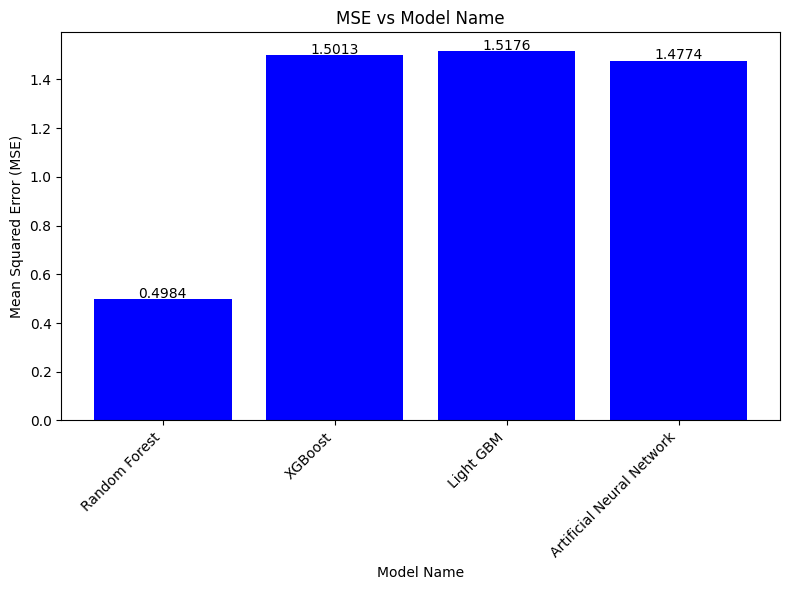

In [61]:
#Graph of mse vs model

model_names = ['Random Forest', 'XGBoost', 'Light GBM', 'Artificial Neural Network']
mse = []

mse.append(mse_values[2])
mse.append(mse_values[4])
mse.append(mse_values[5])
mse.append(mse_values[6])


fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figure size as needed
bars = plt.bar(model_names, mse, color='blue')
plt.xlabel('Model Name')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs Model Name')

for bar, value in zip(bars, mse):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.005, f'{value:.4f}', ha='center')

plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()  # Adjust layout for better appearance

plt.savefig('mse_vs_model.jpg', bbox_inches='tight')
plt.show()
